# 케라스 다양한 학습 기술

- 과대적합, 과소적합을 막기 위한 방법들
  - 모델의 크기 축소
  
  - 초기화

  - 옵티마이저

  - 배치 정규화

  - 규제화

### 모델의 크기 축소
- 가장 단순한 방법

- 모델의 크기를 줄인다는 것은 **학습 파라미터의 수를 줄이는 것**

#### 데이터 준비
- 설명을 위한 코드

In [4]:
from tensorflow.keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_seq(seqs, dim=10000):
  results = np.zeros((len(seqs), dim))
  for i, seq in enumerate(seqs):
    results[i, seq] = 1.
  
  return results

x_train = vectorize_seq(train_data)
x_test = vectorize_seq(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17465344/17464789 [==============================] - 0s 0us/step


#### 2가지의 모델 설정

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
model_1 = Sequential([Dense(16, activation='relu', input_shape=(10000,), name='input'),
                      Dense(16, activation='relu', name='hidden'),
                      Dense(1, activation='sigmoid', name='output')])

In [8]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 16)                160016    
_________________________________________________________________
hiddne (Dense)               (None, 16)                272       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [9]:
model_2 = Sequential([Dense(7, activation='relu', input_shape=(10000,), name='input2'),
                      Dense(7, activation='relu', name='hidden2'),
                      Dense(1, activation='sigmoid', name='output2')])

In [10]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input2 (Dense)               (None, 7)                 70007     
_________________________________________________________________
hidden2 (Dense)              (None, 7)                 56        
_________________________________________________________________
output2 (Dense)              (None, 1)                 8         
Total params: 70,071
Trainable params: 70,071
Non-trainable params: 0
_________________________________________________________________


In [11]:
model_1.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])
model_2.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

#### 2개의 모델 학습

In [13]:
model_1_hist = model_1.fit(x_train, y_train,
                           epochs=20,
                           batch_size=512,
                           validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 56ms/step - loss: 0.4514 - acc: 0.8208 - val_loss: 0.3710 - val_acc: 0.8488
Epoch 2/20
49/49 [==============================] - 2s 36ms/step - loss: 0.2581 - acc: 0.9078 - val_loss: 0.2824 - val_acc: 0.8891
Epoch 3/20
49/49 [==============================] - 2s 36ms/step - loss: 0.1976 - acc: 0.9292 - val_loss: 0.2967 - val_acc: 0.8809
Epoch 4/20
49/49 [==============================] - 2s 36ms/step - loss: 0.1635 - acc: 0.9404 - val_loss: 0.3066 - val_acc: 0.8802
Epoch 5/20
49/49 [==============================] - 2s 36ms/step - loss: 0.1390 - acc: 0.9503 - val_loss: 0.3167 - val_acc: 0.8787
Epoch 6/20
49/49 [==============================] - 2s 36ms/step - loss: 0.1243 - acc: 0.9554 - val_loss: 0.3549 - val_acc: 0.8714
Epoch 7/20
49/49 [==============================] - 2s 36ms/step - loss: 0.1078 - acc: 0.9622 - val_loss: 0.3690 - val_acc: 0.8684
Epoch 8/20
49/49 [==============================] - 2s 36ms/step - loss: 0.0958 - a

In [14]:
model_2_hist = model_2.fit(x_train, y_train,
                           epochs=20,
                           batch_size=512,
                           validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 67ms/step - loss: 0.4527 - acc: 0.8164 - val_loss: 0.3474 - val_acc: 0.8758
Epoch 2/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2699 - acc: 0.9059 - val_loss: 0.2958 - val_acc: 0.8849
Epoch 3/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2100 - acc: 0.9268 - val_loss: 0.2817 - val_acc: 0.8880
Epoch 4/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1779 - acc: 0.9371 - val_loss: 0.2900 - val_acc: 0.8847
Epoch 5/20
49/49 [==============================] - 2s 37ms/step - loss: 0.1553 - acc: 0.9466 - val_loss: 0.3031 - val_acc: 0.8807
Epoch 6/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1363 - acc: 0.9544 - val_loss: 0.3148 - val_acc: 0.8783
Epoch 7/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1231 - acc: 0.9589 - val_loss: 0.3351 - val_acc: 0.8741
Epoch 8/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1093 - a

#### 비교

In [15]:
epochs = range(1,21)
model_1_val_loss = model_1_hist.history['val_loss']
model_2_val_loss = model_2_hist.history['val_loss']

In [16]:
import matplotlib.pyplot as plt
plt.style.use(['seaborn-white'])

model_2 (더 작은 모델)이 '조금 더 나중에' 과대적합 발생

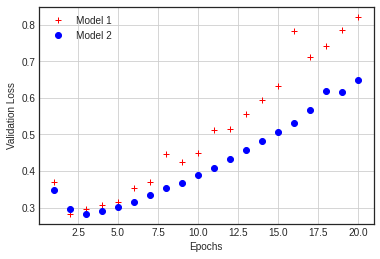

In [19]:
plt.plot(epochs, model_1_val_loss, 'r+', label = 'Model 1')
plt.plot(epochs, model_2_val_loss, 'bo', label = 'Model 2')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

### 모델의 크기 축소 (2)


#### 모델 구성

In [20]:
model_3 = Sequential([Dense(1024, activation='relu', input_shape=(10000,), name='input3'),
                      Dense(1024, activation='relu', name='hidden3'),
                      Dense(1, activation='sigmoid', name='output3')])

model_3.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input3 (Dense)               (None, 1024)              10241024  
_________________________________________________________________
hidden3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
output3 (Dense)              (None, 1)                 1025      
Total params: 11,291,649
Trainable params: 11,291,649
Non-trainable params: 0
_________________________________________________________________


#### 모델 학습
- 시간 소요

In [21]:
model_3_hist = model_3.fit(x_train, y_train,
                           epochs=20,
                           batch_size=512,
                           validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 33s 669ms/step - loss: 0.5428 - acc: 0.7812 - val_loss: 0.2938 - val_acc: 0.8850
Epoch 2/20
49/49 [==============================] - 33s 666ms/step - loss: 0.2227 - acc: 0.9150 - val_loss: 0.4519 - val_acc: 0.8078
Epoch 3/20
49/49 [==============================] - 33s 664ms/step - loss: 0.1171 - acc: 0.9586 - val_loss: 0.3971 - val_acc: 0.8753
Epoch 4/20
49/49 [==============================] - 33s 667ms/step - loss: 0.0554 - acc: 0.9842 - val_loss: 0.4623 - val_acc: 0.8854
Epoch 5/20
49/49 [==============================] - 32s 662ms/step - loss: 0.1255 - acc: 0.9848 - val_loss: 0.4394 - val_acc: 0.8811
Epoch 6/20
49/49 [==============================] - 32s 663ms/step - loss: 0.0012 - acc: 0.9998 - val_loss: 0.6714 - val_acc: 0.8839
Epoch 7/20
49/49 [==============================] - 32s 662ms/step - loss: 7.0883e-05 - acc: 1.0000 - val_loss: 0.8339 - val_acc: 0.8822
Epoch 8/20
49/49 [==============================] - 32s 663ms/ste

#### 시각화

In [22]:
model_3_val_loss = model_3_hist.history['val_loss']

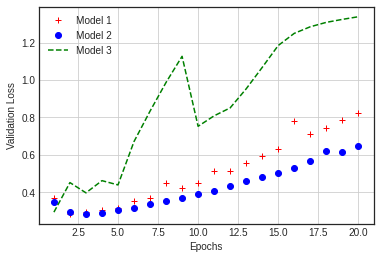

In [24]:
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, model_2_val_loss, 'bo', label='Model 2')
plt.plot(epochs, model_3_val_loss, 'g--', label='Model 3')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

* 볼륨이 큰 신경망일수록 빠르게 훈련데이터 모델링 가능(학습 손실이 낮아짐)
* 과대 적합에는 더욱 민감해짐
* 이는 학습-검증 데이터의 손실을 보면 알 수 있음

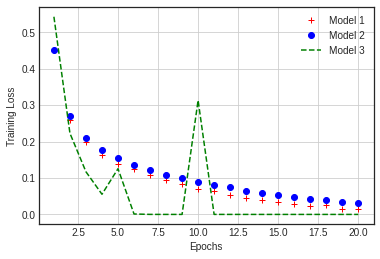

In [25]:
model_1_train_loss = model_1_hist.history['loss']
model_2_train_loss = model_2_hist.history['loss']
model_3_train_loss = model_3_hist.history['loss']


plt.plot(epochs, model_1_train_loss, 'r+', label='Model 1')
plt.plot(epochs, model_2_train_loss, 'bo', label='Model 2')
plt.plot(epochs, model_3_train_loss, 'g--', label='Model 3')

plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()
plt.grid()

plt.show()

### 가중치 초기화


#### 초기화 전략

- Glorot Initialization (Xavier)
  - 활성화 함수  
    - 없음
    - tanh
    - sigmoid
    - softmax

- He Initialization 
  - 활성화 함수  
    - ReLU
    - LeakyReLU
    - ELU 등

    

In [27]:
from tensorflow.keras.layers import Dense, LeakyReLU, Activation
from tensorflow.keras.models import Sequential

In [28]:
model = Sequential([Dense(30, kernel_initializer='he_normal', input_shape=[10,10]),
                    LeakyReLU(alpha=0.2),
                    Dense(1,kernel_initializer='he_normal'),
                    Activation('softmax')])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10, 30)            330       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 10, 30)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 10, 1)             31        
_________________________________________________________________
activation (Activation)      (None, 10, 1)             0         
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


### 고속 옵티마이저

#### 모멘텀 최적화

$
\qquad v \ \leftarrow \ \alpha \ v - \gamma \ \frac{\partial L}{\partial W} \\
\qquad W \ \leftarrow \ W \ + \ v
$

  - $\alpha\ $ : 관성계수 

  - $v$ :  속도

  - $\gamma\ $ : 학습률

  - $\frac{\partial L}{\partial W}\ $ : 손실함수에 대한 미분

In [29]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD

In [30]:
optimizer = SGD(learning_rate=0.001, momentum=.9)

#### 네스테로프 (Nesterov)

- 모멘텀의 방향으로 조금 앞선 곳에서 손실함수의 그라디언트를 구함

- 시간이 지날수록 조금 더 빨리 최솟값에 도달

$
\qquad m \ \leftarrow \  \beta m - \eta \bigtriangledown_\theta J(\theta + \beta m) \\
\qquad \theta \ \leftarrow \ \theta \ + m
$


  - $h\ $ : 기존 기울기를 제곱하여 더한 값

  - $\eta\ $ : 학습률

  - $\bigtriangledown_\theta J(\theta) \ $ : $\theta$에 대한 미분(그라디언트)

  <img src="https://t1.daumcdn.net/cfile/tistory/99D91C455C76428D11">

  <sub>출처: CS231n</sub>

In [31]:
optimizer = SGD(learning_rate=0.001, momentum=.9, nesterov=True)

#### AdaGrad

- 보통 간단한 모델에는 효과 좋을 수는 있으나, 심층 신경망 모델에서는 사용 X

$
\qquad h \ \leftarrow \  h + \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
\qquad W \ \leftarrow \ W \ + \gamma \frac{1}{\sqrt h} \ \frac{\partial L}{\partial W}
$

  - $h\ $ : 기존 기울기를 제곱하여 더한 값

  - $\gamma\ $ : 학습률

  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분


In [32]:
from tensorflow.keras.optimizers import Adagrad

In [33]:
optimizer = Adagrad(learning_rate=.001)

#### RMSProp


$
\qquad s \ \leftarrow \ \beta \ s + (1 - \beta) \bigtriangledown_{\theta} J(\theta) \otimes \bigtriangledown_{\theta} J(\theta) \\
\qquad \theta \ \leftarrow \ \theta \ - \eta  \ \bigtriangledown_{\theta} J(\theta) \oslash \sqrt{s + \epsilon}
$

  - $s \ $ : 그래디언트의 제곱을 감쇠율을 곱한 후 더함

  - $\eta\ $ : 학습률

  - $\bigtriangledown_{\theta} J(\theta) \ $ : 손실함수의 미분값


  

In [34]:
from tensorflow.keras.optimizers import RMSprop

In [35]:
optimizer = RMSprop(learning_rate=.001, rho=0.9)

#### Adam

$
\qquad m \ \leftarrow \  \beta_1 \ m - (1 - \beta_1)\ \frac{\partial L}{\partial W}  \\
\qquad s \ \leftarrow \ \beta_2 \ s + (1 - \beta_2) \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
\qquad \hat{m} \ \leftarrow \frac{m}{1 - \beta_1^t} \\
\qquad \hat{s} \ \leftarrow \frac{s}{1 - \beta_2^t} \\
\qquad W \ \leftarrow \ W \ + \gamma \ \hat{m}\  \oslash \sqrt{\hat{s} + \epsilon}
$

  - $\beta\ $ : 지수 평균의 업데이트 계수

  - $\gamma\ $ : 학습률

  - $\beta_1 \approx 0.9\ ,\ \ \beta_2 \approx 0.999$

  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분

In [36]:
from tensorflow.keras.optimizers import Adam

In [37]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999,epsilon=1e-9)

### 배치 정규화
- 모델에 주입되는 샘플들을 균일하게 만드는 방법

- 학습 후 새로운 데이터에 잘 일반화 할 수 있도록 도와줌

- 데이터 전처리 단계에서 진행해도 되지만 정규화가 되어서 layer에 들어갔다는 보장이 없음

- 주로 **Dense** 또는 **Conv2D** Layer 후, **활성화 함수**이전에 놓임


In [39]:
from tensorflow.keras.layers import BatchNormalization, Dense, Activation
from tensorflow.keras.utils import plot_model

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
Total params: 25,248
Trainable params: 25,184
Non-trainable params: 64
_________________________________________________________________


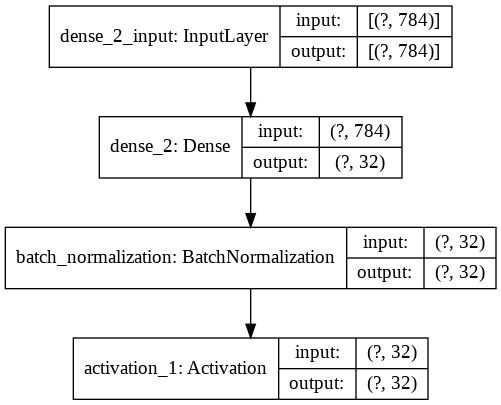

In [40]:
model = Sequential()

model.add(Dense(32, input_shape=(28*28,), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.summary()

plot_model(model, show_shapes=True)

### 규제화
- 복잡한 네트워크 일수록 네트워크의 복잡도에 제한을 두어  
  가중치가 작은 값을 가지도록 함

- 가중치의 분포가 더 균일하게 됨

- 네트워크 손실함수에 큰 가중치에 연관된 비용을 추가
  - L1 규제 : 가중치의 절댓값에 비례하는 비용이 추가
  - L2 규제 : 가중치의 제곱에 비례하는 비용이 추가(흔히 가중치 감쇠라고도 불림)
  - 위 2규제가 합쳐진 경우도 존재

데이터는 **모델의 크기** 파트에서 사용된 imdb dataset

In [41]:
from tensorflow.keras.regularizers import l1, l2, l1_l2

#### 모델 구성

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


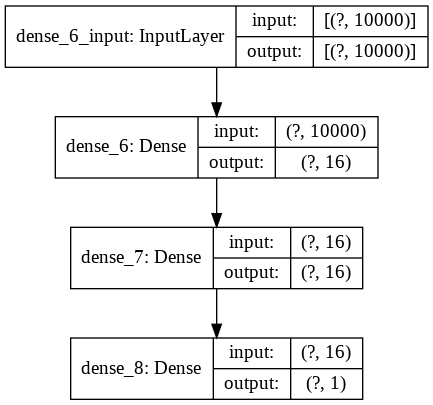

In [43]:
l2_model = Sequential([Dense(16, kernel_regularizer=l2(0.001), activation='relu',input_shape=(10000,)),
                       Dense(16, kernel_regularizer=l2(0.001), activation='relu'),
                       Dense(1, activation='sigmoid')])
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

l2_model.summary()
plot_model(l2_model, show_shapes=True)

#### 모델 학습

In [44]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 7s 141ms/step - loss: 0.4908 - acc: 0.8174 - val_loss: 0.3786 - val_acc: 0.8807
Epoch 2/20
49/49 [==============================] - 2s 44ms/step - loss: 0.3165 - acc: 0.9048 - val_loss: 0.3555 - val_acc: 0.8754
Epoch 3/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2707 - acc: 0.9195 - val_loss: 0.3313 - val_acc: 0.8892
Epoch 4/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2491 - acc: 0.9294 - val_loss: 0.3353 - val_acc: 0.8852
Epoch 5/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2387 - acc: 0.9326 - val_loss: 0.3920 - val_acc: 0.8630
Epoch 6/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2301 - acc: 0.9375 - val_loss: 0.3469 - val_acc: 0.8821
Epoch 7/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2226 - acc: 0.9398 - val_loss: 0.3878 - val_acc: 0.8689
Epoch 8/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2176 - 

#### 시각화
- Model 1은 **모델의 크기 축소**파트에서의 모델

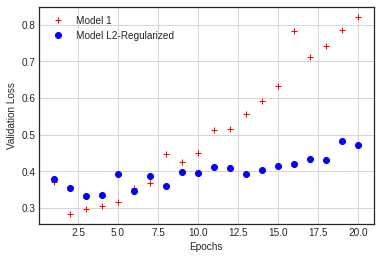

In [47]:
l2_model_val_loss = l2_model_hist.history['val_loss']

epochs= range(1,21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, l2_model_val_loss, 'bo', label='Model L2-Regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

#### L1과 비교

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


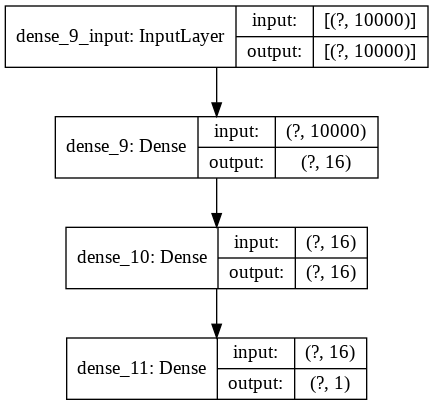

In [48]:
l1_model = Sequential([Dense(16, kernel_regularizer=l1(0.0001), activation='relu',input_shape=(10000,)),
                       Dense(16, kernel_regularizer=l1(0.0001), activation='relu'),
                       Dense(1, activation='sigmoid')])
l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

l1_model.summary()
plot_model(l1_model, show_shapes=True)

In [49]:
l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 65ms/step - loss: 0.5637 - acc: 0.8217 - val_loss: 0.4370 - val_acc: 0.8740
Epoch 2/20
49/49 [==============================] - 2s 39ms/step - loss: 0.3805 - acc: 0.8911 - val_loss: 0.4082 - val_acc: 0.8654
Epoch 3/20
49/49 [==============================] - 2s 39ms/step - loss: 0.3411 - acc: 0.9021 - val_loss: 0.3649 - val_acc: 0.8852
Epoch 4/20
49/49 [==============================] - 2s 39ms/step - loss: 0.3227 - acc: 0.9074 - val_loss: 0.3640 - val_acc: 0.8858
Epoch 5/20
49/49 [==============================] - 2s 39ms/step - loss: 0.3098 - acc: 0.9123 - val_loss: 0.3589 - val_acc: 0.8869
Epoch 6/20
49/49 [==============================] - 2s 39ms/step - loss: 0.3034 - acc: 0.9162 - val_loss: 0.3810 - val_acc: 0.8784
Epoch 7/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2973 - acc: 0.9176 - val_loss: 0.3700 - val_acc: 0.8841
Epoch 8/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2921 - a

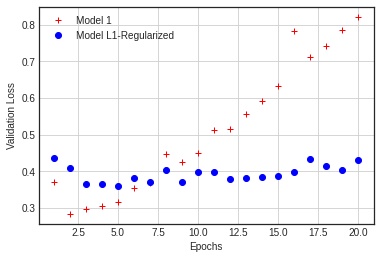

In [50]:
l1_model_val_loss = l1_model_hist.history['val_loss']

epochs= range(1,21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, l1_model_val_loss, 'bo', label='Model L1-Regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

3가지 모델 비교
- Original
- L1
- L2

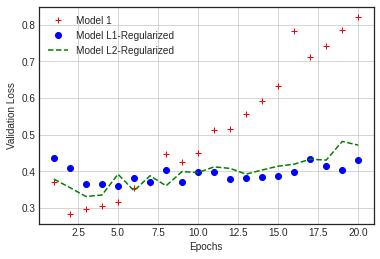

In [52]:
epochs= range(1,21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, l1_model_val_loss, 'bo', label='Model L1-Regularized')
plt.plot(epochs, l2_model_val_loss, 'g--', label='Model L2-Regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

#### L1, L2와 비교

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_16 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


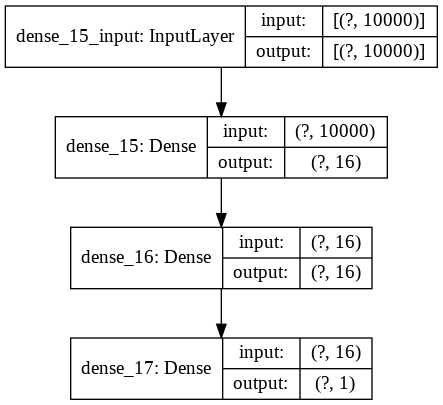

In [53]:
l1_l2_model = Sequential([Dense(16, kernel_regularizer=l1_l2(l1=0.0001,l2=0.0001), activation='relu',input_shape=(10000,)),
                       Dense(16, kernel_regularizer=l1_l2(l1=0.0001,l2=0.0001), activation='relu'),
                       Dense(1, activation='sigmoid')])
l1_l2_model.compile(optimizer='rmsprop',
                    loss='binary_crossentropy',
                    metrics=['acc'])

l1_l2_model.summary()
plot_model(l1_l2_model, show_shapes=True)

In [54]:
l1_l2_model_hist = l1_l2_model.fit(x_train, y_train,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 51ms/step - loss: 0.5593 - acc: 0.8119 - val_loss: 0.4276 - val_acc: 0.8770
Epoch 2/20
49/49 [==============================] - 2s 39ms/step - loss: 0.3723 - acc: 0.8952 - val_loss: 0.3708 - val_acc: 0.8904
Epoch 3/20
49/49 [==============================] - 2s 39ms/step - loss: 0.3378 - acc: 0.9043 - val_loss: 0.3967 - val_acc: 0.8731
Epoch 4/20
49/49 [==============================] - 2s 39ms/step - loss: 0.3190 - acc: 0.9121 - val_loss: 0.3773 - val_acc: 0.8814
Epoch 5/20
49/49 [==============================] - 2s 39ms/step - loss: 0.3106 - acc: 0.9145 - val_loss: 0.3780 - val_acc: 0.8810
Epoch 6/20
49/49 [==============================] - 2s 39ms/step - loss: 0.3005 - acc: 0.9184 - val_loss: 0.3724 - val_acc: 0.8852
Epoch 7/20
49/49 [==============================] - 2s 40ms/step - loss: 0.2959 - acc: 0.9230 - val_loss: 0.3796 - val_acc: 0.8820
Epoch 8/20
49/49 [==============================] - 2s 44ms/step - loss: 0.2908 - a

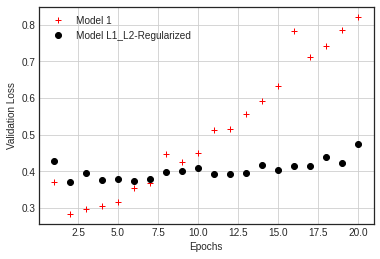

In [56]:
l1_l2_model_val_loss = l1_l2_model_hist.history['val_loss']

epochs= range(1,21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, l1_l2_model_val_loss, 'ko', label='Model L1_L2-Regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

4가지 모델 비교
- Original

- L1

- L2

- L1_L2

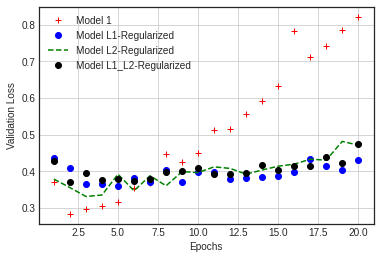

In [57]:
epochs= range(1,21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, l1_model_val_loss, 'bo', label='Model L1-Regularized')
plt.plot(epochs, l2_model_val_loss, 'g--', label='Model L2-Regularized')
plt.plot(epochs, l1_l2_model_val_loss, 'ko', label='Model L1_L2-Regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

### 드롭아웃(Dropout)
- 신경망을 위해 사용되는 규제 기법 중 가장 효과적이고 널리 사용되는 방법

- 신경망의 레이어에 드롭아웃을 적용하면 훈련하는 동안 무작위로 층의 일부 특성(노드)를 제외
  - 예를 들어, [1.0, 3.2, 0.6, 0.8, 1.1] 라는 벡터에 대해 드롭아웃을 적용하면 **무작위로 0으로 바뀜**  
    $\rightarrow$ [0, 3.2, 0.6, 0.8, 0]

  - 보통 0.2 ~ 0.5 사이의 비율로 지정됨

- 테스트 단계에서는 그 어떤 노드도 드롭아웃 되지 않는다.
  - 대신 해당 레이어의 출력 노드를 드롭아웃 비율에 맞게 줄여줌

In [58]:
from tensorflow.keras.layers import Dropout

#### 모델 구성

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                160016    
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


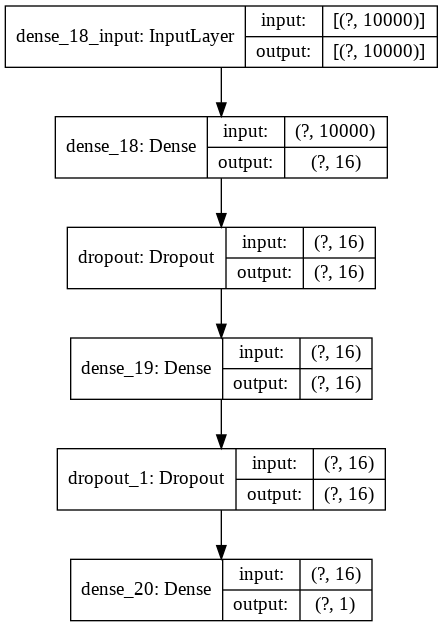

In [59]:
dropout_model = Sequential([Dense(16, activation='relu',input_shape=(10000,)),
                            Dropout(0.5),
                            Dense(16, activation='relu'),
                            Dropout(0.5),
                            Dense(1, activation='sigmoid')])
dropout_model.compile(optimizer='rmsprop',
                    loss='binary_crossentropy',
                    metrics=['acc'])

dropout_model.summary()
plot_model(dropout_model, show_shapes=True)

#### 모델 학습

In [61]:
dropout_model_hist = dropout_model.fit(x_train, y_train,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 65ms/step - loss: 0.6049 - acc: 0.6728 - val_loss: 0.4844 - val_acc: 0.8638
Epoch 2/20
49/49 [==============================] - 2s 37ms/step - loss: 0.4572 - acc: 0.8214 - val_loss: 0.3675 - val_acc: 0.8837
Epoch 3/20
49/49 [==============================] - 2s 37ms/step - loss: 0.3679 - acc: 0.8688 - val_loss: 0.3076 - val_acc: 0.8870
Epoch 4/20
49/49 [==============================] - 2s 37ms/step - loss: 0.3163 - acc: 0.8931 - val_loss: 0.2866 - val_acc: 0.8886
Epoch 5/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2738 - acc: 0.9117 - val_loss: 0.2932 - val_acc: 0.8885
Epoch 6/20
49/49 [==============================] - 2s 37ms/step - loss: 0.2444 - acc: 0.9202 - val_loss: 0.3057 - val_acc: 0.8855
Epoch 7/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2208 - acc: 0.9285 - val_loss: 0.2955 - val_acc: 0.8851
Epoch 8/20
49/49 [==============================] - 2s 37ms/step - loss: 0.1952 - a

#### 시각화

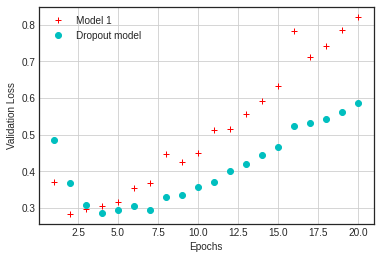

In [62]:
dropout_model_val_loss = dropout_model_hist.history['val_loss']

epochs= range(1,21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, dropout_model_val_loss, 'co', label='Dropout model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()